## 使用自己的資料集進行建模(簡單線模、增廣型線模)

### 生成與處理資料函式

In [2]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

#生成資料
def GenDataforTwo(seed,n1,n2,mu1,mu2,Cov1,Cov2):
    rng = np.random.default_rng(seed = seed)
    mvn1 = rng.multivariate_normal(mean = mu1 ,cov = Cov1 ,size = n1)
    mvn2 = rng.multivariate_normal(mean = mu2 ,cov = Cov2 ,size = n2)
    A,B = mvn1,mvn2
    x = np.vstack((A,B))
    y = np.hstack((np.zeros(n1),np.ones(n2)))
    D = np.c_[x, y]
    return D

#切割訓練與測試資料
#X = D[:, 0:2]
#y = D[:, 2]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#D_train = np.hstack((X_train, y_train.reshape(-1, 1)))
#D_test = np.hstack((X_test, y_test.reshape(-1, 1)))



### 5種不同情況的資料集 (資料母體)

1.

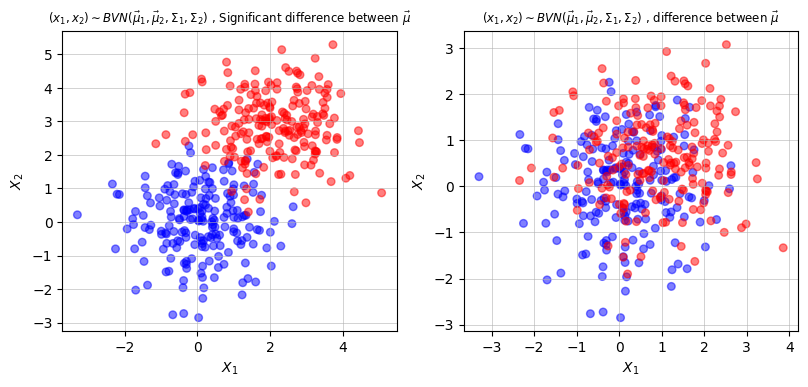

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
################# 生成資料 #####################
D1 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200 ,mu1 = np.array([0, 0]) ,mu2 = np.array([2, 3])
                    ,Cov1 = np.array([[1, 0], [0, 1]]),Cov2 = np.array([[1, 0], [0, 1]]))
D2 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200 ,mu1 = np.array([0, 0]) ,mu2 = np.array([0.8, 0.8])
                    ,Cov1 = np.array([[1, 0], [0, 1]]),Cov2 = np.array([[1, 0], [0, 1]]))

################## 資料散佈 #########################
fig , ax = plt.subplots(nrows = 1 ,ncols = 2 ,figsize = (9.5,3.9))

ax[0].grid(True,linewidth = 0.4)
ax[0].set_xlabel('$X_1$') , ax[0].set_ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' for i in D1[:,2]]
ax[0].scatter(D1[:, 0], D1[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
ax[0].set_title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , Significant difference between $\\vec\mu$' ,fontsize = 8.5)

ax[1].grid(True,linewidth = 0.4)
ax[1].set_xlabel('$X_1$') , ax[1].set_ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' for i in D2[:,2]]
ax[1].scatter(D2[:, 0], D2[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
ax[1].set_title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , difference between $\\vec\mu$' ,fontsize = 8.5)

plt.savefig('statcomp_hw4_plot1.png')

2.

C:\Users\yangs\AppData\Local\Temp\ipykernel_17108\3743162730.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  mvn1 = rng.multivariate_normal(mean = mu1 ,cov = Cov1 ,size = n1)
C:\Users\yangs\AppData\Local\Temp\ipykernel_17108\3743162730.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  mvn2 = rng.multivariate_normal(mean = mu2 ,cov = Cov2 ,size = n2)


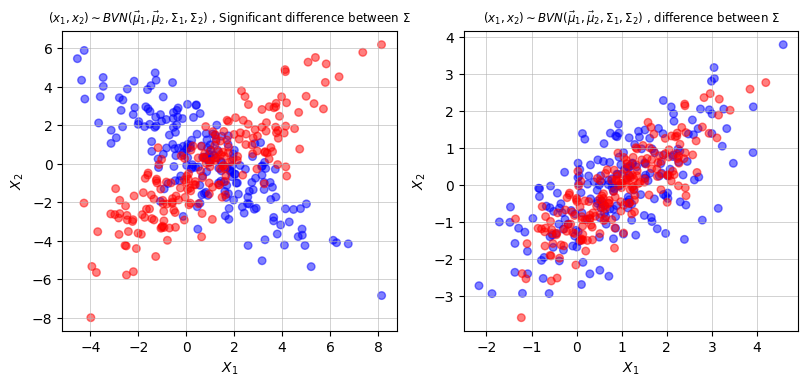

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
################# 生成資料 #####################
D3 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200,mu1 = np.array([1, 0]) ,mu2 = np.array([1, 0])
                    ,Cov1 = np.array([[4, -5], [-5, 4]]),Cov2 = np.array([[4, 5], [5, 4]]))
D4 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200 ,mu1 = np.array([1, 0]) ,mu2 = np.array([1, 0])
                    ,Cov1 = np.array([[1, 1.5], [1.5, 1]]),Cov2 = np.array([[1, 0.8], [0.8, 1]]))

################## 資料散佈 #########################
fig , ax = plt.subplots(nrows = 1 ,ncols = 2 ,figsize = (9.5,3.9))

ax[0].grid(True,linewidth = 0.4)
ax[0].set_xlabel('$X_1$') , ax[0].set_ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' for i in D3[:,2]]
ax[0].scatter(D3[:, 0], D3[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
ax[0].set_title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , Significant difference between $\\Sigma$' ,fontsize = 8.5)

ax[1].grid(True,linewidth = 0.4)
ax[1].set_xlabel('$X_1$') , ax[1].set_ylabel('$X_2$')
colors = ['blue' if i == 0 else 'red' for i in D4[:,2]]
ax[1].scatter(D4[:, 0], D4[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
ax[1].set_title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , difference between $\\Sigma$' ,fontsize = 8.5)

plt.savefig('statcomp_hw4_plot2.png')

3.

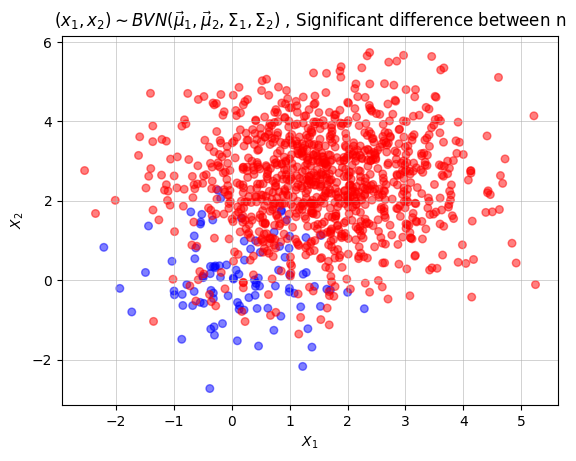

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
################# 生成資料 #####################
D5 = GenDataforTwo(seed = 123 ,n1 = 100 ,n2 = 1000 ,mu1 = np.array([0, 0]) ,mu2 = np.array([1.5, 2.5])
                    ,Cov1 = np.array([[1, 0], [0, 1]]),Cov2 = np.array([[1.5, 0], [0, 1.5]]))

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D5[:,2]]
plot = ax.scatter(D5[:, 0], D5[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
ax.set_title(f'$(x_1,x_2)\sim BVN(\\vec\mu_1,\\vec\mu_2,\\Sigma_1,\\Sigma_2)$ , Significant difference between n')

plt.savefig('statcomp_hw4_plot3.png')

### 生成兩組資料並做建模 先畫訓練再畫測試

1. $\mu$ 差異大之訓練資料與測試資料

 (1)訓練

accuracy in training for Linear regression: 96.7857%
accuracy in training for Augmented regression: 97.1429%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\3404714134.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))


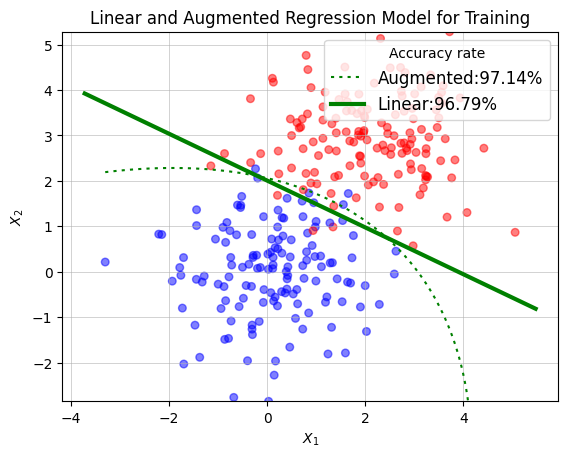

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

################# 生成資料 #####################
D1 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200 ,mu1 = np.array([0, 0]) ,mu2 = np.array([2, 3])
                    ,Cov1 = np.array([[1, 0], [0, 1]]),Cov2 = np.array([[1, 0], [0, 1]]))
#切割訓練與測試資料
X = D1[:, 0:2]
y = D1[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
D1_train = np.hstack((X_train, y_train.reshape(-1, 1)))
D1_test = np.hstack((X_test, y_test.reshape(-1, 1)))

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D1_train[:,2]]
plot = ax.scatter(D1_train[:, 0], D1_train[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D1_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D1_train[:, 0:2])) #建立計算矩陣
y_L = D1_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

y_hat_L = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == y_L)))

#增廣
x1 = D1_train[:, 0:1] # n x 1 vector
x2 = D1_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D1_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

y_hat_A = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == y_A)))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))  

plt.title('Linear and Augmented Regression Model for Training')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == y_A)) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == y_L))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot4.png')


 (2)測試

accuracy in training for Linear regression: 95.8333%
accuracy in training for Augmented regression: 96.6667%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\3146945325.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D1_test[:, 2])))


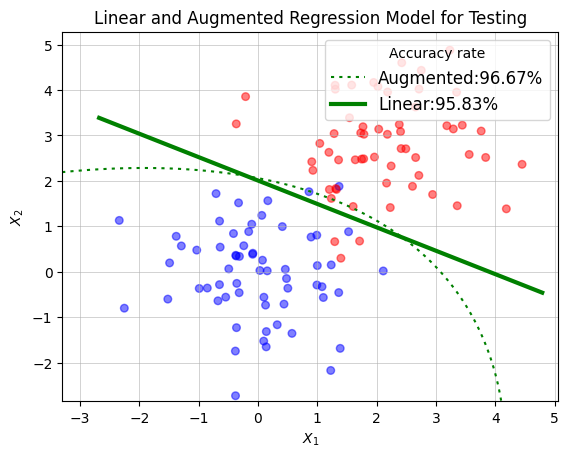

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D1_test[:,2]]
plot = ax.scatter(D1_test[:, 0], D1_test[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D1_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D1_train[:, 0:2])) #建立計算矩陣
y_L = D1_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

X_pred = np.hstack((np.ones((len(X_test), 1)), X_test)) ### 預測 測試資料

y_hat_L = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == D1_test[:, 2])))

#增廣
x1 = D1_train[:, 0:1] # n x 1 vector
x2 = D1_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D1_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

x1_pred = D1_test[:, 0:1] # n x 1 vector
x2_pred = D1_test[:, 1:2]
X_pred = np.hstack((x1_pred, x2_pred, x1_pred * x2_pred, x1_pred ** 2, x2_pred ** 2))

y_hat_A = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == D1_test[:, 2])))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D1_test[:, 2])))  

plt.title('Linear and Augmented Regression Model for Testing')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == D1_test[:, 2])) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == D1_test[:, 2]))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot5.png')


2.$\mu$ 差異小之訓練與測試

(1)訓練

accuracy in training for Linear regression: 68.9286%
accuracy in training for Augmented regression: 68.9286%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\3765015742.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))


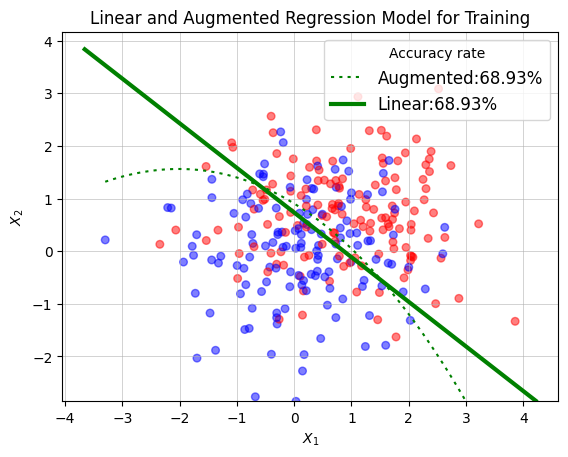

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

################# 生成資料 #####################
D2 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200 ,mu1 = np.array([0, 0]) ,mu2 = np.array([0.8, 0.8])
                    ,Cov1 = np.array([[1, 0], [0, 1]]),Cov2 = np.array([[1, 0], [0, 1]]))
#切割訓練與測試資料
X = D2[:, 0:2]
y = D2[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
D2_train = np.hstack((X_train, y_train.reshape(-1, 1)))
D2_test = np.hstack((X_test, y_test.reshape(-1, 1)))

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D2_train[:,2]]
plot = ax.scatter(D2_train[:, 0], D2_train[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D2_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D2_train[:, 0:2])) #建立計算矩陣
y_L = D2_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

y_hat_L = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == y_L)))

#增廣
x1 = D2_train[:, 0:1] # n x 1 vector
x2 = D2_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D2_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

y_hat_A = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == y_A)))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))  

plt.title('Linear and Augmented Regression Model for Training')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == y_A)) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == y_L))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot6.png')


(2)測試

accuracy in training for Linear regression: 72.5000%
accuracy in training for Augmented regression: 71.6667%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\1612575818.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D2_test[:, 2])))


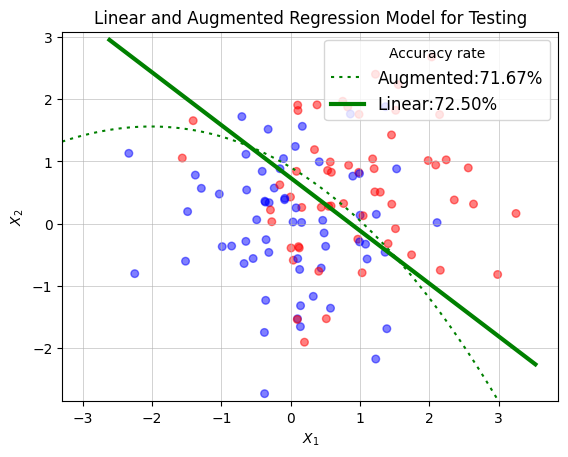

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D2_test[:,2]]
plot = ax.scatter(D2_test[:, 0], D2_test[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D2_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D2_train[:, 0:2])) #建立計算矩陣
y_L = D2_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

X_pred = np.hstack((np.ones((len(X_test), 1)), X_test)) ### 預測 測試資料

y_hat_L = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == D2_test[:, 2])))

#增廣
x1 = D2_train[:, 0:1] # n x 1 vector
x2 = D2_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D2_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

x1_pred = D2_test[:, 0:1] # n x 1 vector
x2_pred = D2_test[:, 1:2]
X_pred = np.hstack((x1_pred, x2_pred, x1_pred * x2_pred, x1_pred ** 2, x2_pred ** 2))

y_hat_A = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == D2_test[:, 2])))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D2_test[:, 2])))  

plt.title('Linear and Augmented Regression Model for Testing')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == D2_test[:, 2])) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == D2_test[:, 2]))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot7.png')


3.$Cov$差異大之訓練與測試

(1)訓練

accuracy in training for Linear regression: 56.7857%
accuracy in training for Augmented regression: 81.7857%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\3743162730.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  mvn1 = rng.multivariate_normal(mean = mu1 ,cov = Cov1 ,size = n1)
C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\3743162730.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  mvn2 = rng.multivariate_normal(mean = mu2 ,cov = Cov2 ,size = n2)
C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\1592519902.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))


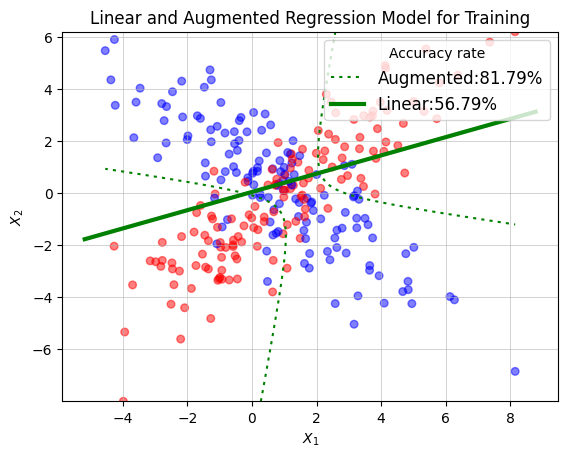

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

################# 生成資料 #####################
D3 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200,mu1 = np.array([1, 0]) ,mu2 = np.array([1, 0])
                    ,Cov1 = np.array([[4, -5], [-5, 4]]),Cov2 = np.array([[4, 5], [5, 4]]))
#切割訓練與測試資料
X = D3[:, 0:2]
y = D3[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
D3_train = np.hstack((X_train, y_train.reshape(-1, 1)))
D3_test = np.hstack((X_test, y_test.reshape(-1, 1)))

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D3_train[:,2]]
plot = ax.scatter(D3_train[:, 0], D3_train[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D3_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D3_train[:, 0:2])) #建立計算矩陣
y_L = D3_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

y_hat_L = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == y_L)))

#增廣
x1 = D3_train[:, 0:1] # n x 1 vector
x2 = D3_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D3_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

y_hat_A = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == y_A)))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))  

plt.title('Linear and Augmented Regression Model for Training')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == y_A)) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == y_L))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot8.png')


(2)測試

accuracy in training for Linear regression: 53.3333%
accuracy in training for Augmented regression: 74.1667%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\2363476502.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D3_test[:, 2])))


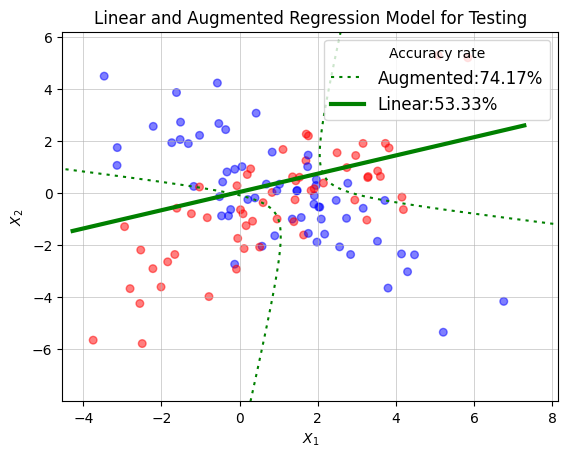

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D3_test[:,2]]
plot = ax.scatter(D3_test[:, 0], D3_test[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D3_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D3_train[:, 0:2])) #建立計算矩陣
y_L = D3_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

X_pred = np.hstack((np.ones((len(X_test), 1)), X_test)) ### 預測 測試資料

y_hat_L = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == D3_test[:, 2])))

#增廣
x1 = D3_train[:, 0:1] # n x 1 vector
x2 = D3_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D3_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

x1_pred = D3_test[:, 0:1] # n x 1 vector
x2_pred = D3_test[:, 1:2]
X_pred = np.hstack((x1_pred, x2_pred, x1_pred * x2_pred, x1_pred ** 2, x2_pred ** 2))

y_hat_A = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == D3_test[:, 2])))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D3_test[:, 2])))  

plt.title('Linear and Augmented Regression Model for Testing')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == D3_test[:, 2])) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == D3_test[:, 2]))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot9.png')


4.$Cov$差異小之訓練與測試資料集

(1)訓練

accuracy in training for Linear regression: 57.1429%
accuracy in training for Augmented regression: 62.8571%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\3743162730.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  mvn1 = rng.multivariate_normal(mean = mu1 ,cov = Cov1 ,size = n1)
C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\2599684095.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))


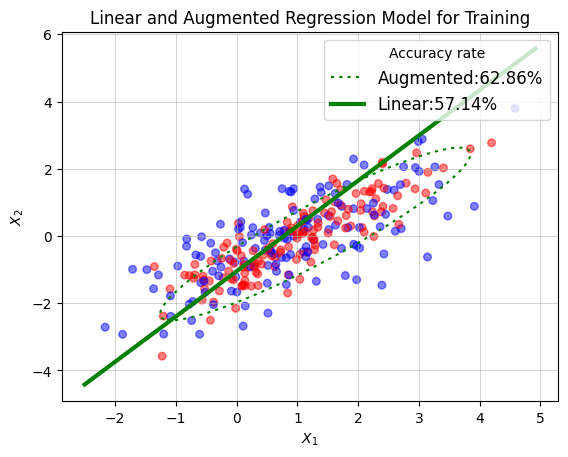

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

################# 生成資料 #####################
D4 = GenDataforTwo(seed = 123 ,n1 = 200 ,n2 = 200 ,mu1 = np.array([1, 0]) ,mu2 = np.array([1, 0])
                    ,Cov1 = np.array([[1, 1.5], [1.5, 1]]),Cov2 = np.array([[1, 0.8], [0.8, 1]]))
#切割訓練與測試資料
X = D4[:, 0:2]
y = D4[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
D4_train = np.hstack((X_train, y_train.reshape(-1, 1)))
D4_test = np.hstack((X_test, y_test.reshape(-1, 1)))

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D4_train[:,2]]
plot = ax.scatter(D4_train[:, 0], D4_train[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D4_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D4_train[:, 0:2])) #建立計算矩陣
y_L = D4_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

y_hat_L = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == y_L)))

#增廣
x1 = D4_train[:, 0:1] # n x 1 vector
x2 = D4_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D4_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

y_hat_A = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == y_A)))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))  

plt.title('Linear and Augmented Regression Model for Training')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == y_A)) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == y_L))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot10.png')


(2)測試

accuracy in training for Linear regression: 53.3333%
accuracy in training for Augmented regression: 62.5000%


C:\Users\yangs\AppData\Local\Temp\ipykernel_13384\3385482333.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D4_test[:, 2])))


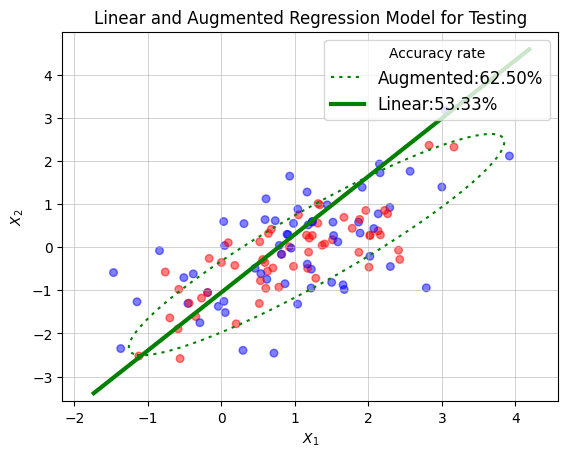

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D4_test[:,2]]
plot = ax.scatter(D4_test[:, 0], D4_test[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D4_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D4_train[:, 0:2])) #建立計算矩陣
y_L = D4_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

X_pred = np.hstack((np.ones((len(X_test), 1)), X_test)) ### 預測 測試資料

y_hat_L = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == D3_test[:, 2])))

#增廣
x1 = D4_train[:, 0:1] # n x 1 vector
x2 = D4_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D4_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

x1_pred = D4_test[:, 0:1] # n x 1 vector
x2_pred = D4_test[:, 1:2]
X_pred = np.hstack((x1_pred, x2_pred, x1_pred * x2_pred, x1_pred ** 2, x2_pred ** 2))

y_hat_A = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == D4_test[:, 2])))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D4_test[:, 2])))  

plt.title('Linear and Augmented Regression Model for Testing')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == D4_test[:, 2])) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == D4_test[:, 2]))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot11.png')


5. n差異大之訓練與測試資料集 

(1)訓練

accuracy in training for Linear regression: 91.5584%
accuracy in training for Augmented regression: 92.9870%


C:\Users\yangs\AppData\Local\Temp\ipykernel_19644\2661175808.py:84: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))


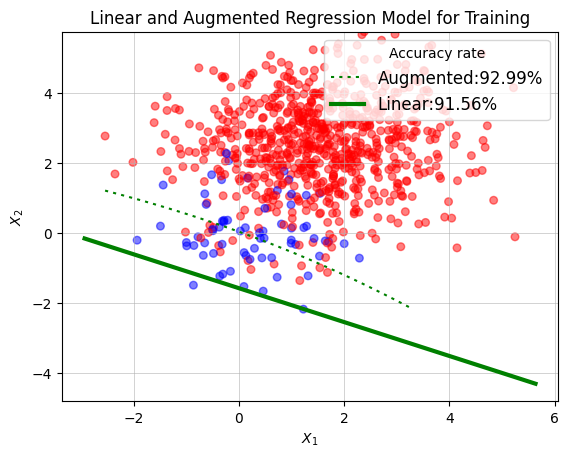

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

################# 生成資料 #####################
D5 = GenDataforTwo(seed = 123 ,n1 = 100 ,n2 = 1000 ,mu1 = np.array([0, 0]) ,mu2 = np.array([1.5, 2.5])
                    ,Cov1 = np.array([[1, 0], [0, 1]]),Cov2 = np.array([[1.5, 0], [0, 1.5]]))
#切割訓練與測試資料
X = D5[:, 0:2]
y = D5[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
D5_train = np.hstack((X_train, y_train.reshape(-1, 1)))
D5_test = np.hstack((X_test, y_test.reshape(-1, 1)))

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D5_train[:,2]]
plot = ax.scatter(D5_train[:, 0], D5_train[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D5_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D5_train[:, 0:2])) #建立計算矩陣
y_L = D5_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

y_hat_L = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == y_L)))

#增廣
x1 = D5_train[:, 0:1] # n x 1 vector
x2 = D5_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D5_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

y_hat_A = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == y_A)))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == y_A)))  

plt.title('Linear and Augmented Regression Model for Training')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == y_A)) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == y_L))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot12.png')


(2)測試

accuracy in training for Linear regression: 90.3030%
accuracy in training for Augmented regression: 93.0303%


C:\Users\yangs\AppData\Local\Temp\ipykernel_19644\3422041287.py:79: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D5_test[:, 2])))


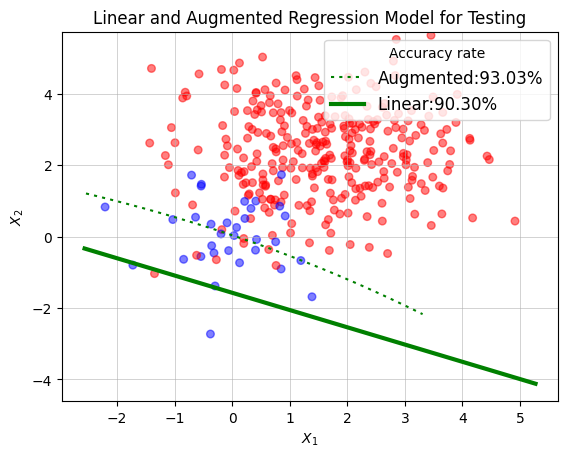

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.linalg as LA
from sklearn.linear_model import LinearRegression

################## 資料散佈 #########################
ax = plt.gca()
ax.grid(True,linewidth = 0.4)
ax.set_xlabel('$X_1$') , ax.set_ylabel('$X_2$')

colors = ['blue' if i == 0 else 'red' for i in D5_test[:,2]]
plot = ax.scatter(D5_test[:, 0], D5_test[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)

############### 模型建立 ######################

#簡單
n = len(D5_train[:, 0]) 
X = np.hstack((np.ones((n, 1)), D5_train[:, 0:2])) #建立計算矩陣
y_L = D5_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y_L) # 進行估計 （ 配適 ）
R2 = Mdl.score(X, y_L) # R−square
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
#print(R2,intrcp,coeffs)

# Draw a regression line
x = np.array(ax.get_xlim()) #直線範圍
f = -(intrcp - 0.5 + coeffs[1] * x) / coeffs[2]
z = ax.plot(x, f, lw=3 ,color = 'g')

X_pred = np.hstack((np.ones((len(X_test), 1)), X_test)) ### 預測 測試資料

y_hat_L = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_L = [1 if i > 0.5 else 0 for i in y_hat_L] # 群組判讀
print("accuracy in training for Linear regression: {:.4f}%".format(100 * np.mean(y_pre_L == D5_test[:, 2])))

#增廣
x1 = D5_train[:, 0:1] # n x 1 vector
x2 = D5_train[:, 1:2]
X = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
X_1 = np.hstack((np.ones((n, 1)), x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y_A = D5_train[:, 2]

# Linear Regression by sklearn
Mdl = LinearRegression()
Mdl.fit(X, y_A) 
intrcp_A = Mdl.intercept_ 
coeffs_A = Mdl.coef_ 
b = LA.pinv(X_1) @ y_A # pseudo inverse

f = (
lambda x: intrcp_A
+ coeffs_A[0] * x[0]
+ coeffs_A[1] * x[1]
+ coeffs_A[2] * x[0] * x[1]
+ coeffs_A[3] * x[0] ** 2
+ coeffs_A[4] * x[1] ** 2)
xx = np.linspace(min(x1), max(x1),  len(x1))
yy = np.linspace(min(x2), max(x2),  len(x2))
X_1, Y = np.meshgrid(xx, yy)
Z = f([X_1, Y])

x1_pred = D5_test[:, 0:1] # n x 1 vector
x2_pred = D5_test[:, 1:2]
X_pred = np.hstack((x1_pred, x2_pred, x1_pred * x2_pred, x1_pred ** 2, x2_pred ** 2))

y_hat_A = Mdl.predict(X_pred) # 預 測 或 計 算 擬 合 值
y_pre_A = [1 if i > 0.5 else 0 for i in y_hat_A] # 群組判讀
print("accuracy in training for Augmented regression: {:.4f}%".format(100 * np.mean(y_pre_A == D5_test[:, 2])))


############## 增廣型線模繪圖 ####################
contours = plt.contour(X_1, Y, Z, levels = [0.5], colors='g', linestyles=':')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label('{:.4f}%'.format(100*np.mean(y_pre_A == D5_test[:, 2])))  

plt.title('Linear and Augmented Regression Model for Testing')
plt.legend([artists[0],z[0],],['Augmented:{:.2f}%'.format(100*np.mean(y_pre_A == D5_test[:, 2])) , 'Linear:{:.2f}%'.format(100 * np.mean(y_pre_L == D5_test[:, 2]))],loc='upper right',title='Accuracy rate',fontsize=12)

plt.savefig('statcomp_hw4_plot13.png')
